# HW6

In [1]:
import numpy as np
import math
from math import pi, sin, cos
from scipy.integrate import quad

def GaussianElimination(A):

    numrows = len(A)    # Number of rows
    numcols = len(A[0]) # Number of columns

    # Gaussian Elimination
    for col in range(numcols - 1):           
        for row in range(col + 1, numrows):
            # print(A, '\n')
            A[row] = A[row] - (A[row, col]/A[col, col]) * A[col]

    # Make solution array
    x = np.array([0.0,0.0,0.0,0.0])   
        
    # Backsub
    for i in range(numrows - 1, -1, -1): 
        hold = 0.0
        for j in range(i + 1, numrows): 
            hold = hold + A[i,j] * x[j]
        x[i] = (A[i, numcols - 1] - hold) / A[i, i]
        
    return x

In [2]:
"""
#P1
"""

x = np.array([0.0,   0.25,    0.5,   0.75,    1.0])
y = np.array([1.0, 1.2840, 1.6487, 2.1170, 2.7183])

def discreetLSP(x, y, degree, xApp):
    
    m = degree + 1
    b       = np.zeros([m,m])
    bCoef   = np.zeros(m)
    equals  = np.zeros(m)
    xExpSum = np.zeros(2 * m)
    xExp    = np.zeros([2 * degree + 1, 2 * degree + 1])
    
    # Find x's to exponents
    for i in range(len(xExp)):
        for j in range(len(xExp)):
            xExp[i,j] = math.pow(x[j],i)
    
    # Find sums of x's to exponents
    for i in range(2 * degree + 1):
        xExpSum[i] = sum(xExp[i,:])
        
    # Find sums of y * x to exponent
    yMult = xExp[0:m,:]
    for i in range(degree + 1):
        for j in range(2 * degree + 1):
            yMult[i,j] = y[j] * yMult[i,j]
    
    # fill b matrix
    for i in range(m):
        for j in range(m):
            b[i,j] = xExpSum[i+j]

    # fill right side
    for i in range(m):
        equals[i] = sum(yMult[i,:])
    
    # concatenate array / matrix
    A = np.array(np.zeros([m,degree+2]))
    for i in range(m):
        for j in range(degree+2):
            if j < m:
                A[i,j] = b[i,j]
            else:
                A[i,j] = equals[i]
    
    # use gaussian elimination to solve
    bCoef = GaussianElimination(A)
    
    # use bCoefs to solve
    yApp = 0
    for i in range(m):
        yApp += bCoef[i] * math.pow(xApp,i)
    
    return yApp

print(discreetLSP(x,y,2,0.8))

2.236424


In [3]:
"""
#P2
"""

def conLSP(degree):
    
    a = np.zeros(degree + 1)
    xExpInt = np.zeros(2 * degree + 1)
    xSinInt = np.zeros(degree + 1)
    AMat = np.zeros([degree + 1, degree + 2])
    rangeStart = 0
    rangeEnd   = 1
    
    # Fill xExp with exponentiated x's
    for power in range(2 * degree + 1):
        xExpInt[power] = quad(lambda x: x**power, rangeStart, rangeEnd)[0]

    # Fill x times sin integrals
    for power in range(degree + 1):
        xSinInt[power] = quad(lambda x: (x**power)*math.sin(pi*x), rangeStart, rangeEnd)[0]
        
    # Fill AMat with values
    for i in range(degree+1):
        for j in range(degree+2):
            if j != degree + 1:
                AMat[i,j] = xExpInt[i+j]
            else:
                AMat[i,j] = xSinInt[i]
    
    # Solve for coefficients 
    a = GaussianElimination(AMat)
    
    # Set x approximation value and plug into equation
    xApp = 0.5
    approximation = a[0] + a[1]*xApp + a[2]*(xApp**2)
    
    return approximation
    
print(conLSP(2))

0.980162407441


In [29]:
"""
#P3
"""

x = np.array([-pi, -9*pi/10, -8*pi/10, -7*pi/10, -6*pi/10, -5*pi/10,
              -4*pi/10, -3*pi/10, -2*pi/10, -pi/10, 0, pi/10, 2*pi/10,
              3*pi/10, 4*pi/10, 5*pi/10, 6*pi/10, 7*pi/10, 8*pi/10, 9*pi/10])

# Fill y
def f(x): return 2 * x**2 - 9
y = [f(z) for z in x]

def dlstp(x,y,n):
    
    # Set m to 3
    m = len(x) / 2
    a = np.zeros(n + 1)
    b = np.zeros(n - 1)
    ycos = np.zeros(len(x))
    ysin = np.zeros(len(x))

    # Create the a's and b's for non zero or 'n' index
    for i in range(n + 1):
        
        # Find a and b for middle terms
        if i != 0 and i != n:
            
            for z in range(len(x)):
                
                ycos[z] = y[z] * cos(i * x[z])
                ysin[z] = y[z] * sin(i * x[z]) 
            
            a[i] = (1/m) * sum(ycos)
            b[i-1] = (1/m) * sum(ysin)
            
        # Find a's on ends
        else:
            
             for z in range(len(x)):
                
                ycos[z] = y[z] * cos(i * x[z])
            
             a[i] = (1/m) * sum(ycos)
        
    return a,b 

a,b = dlstp(x,y,2)
    
print('a = ', a, '\nb = ', b)

a =  [-4.7747301  -8.06612334  2.06711678] 
b =  [ 0.]


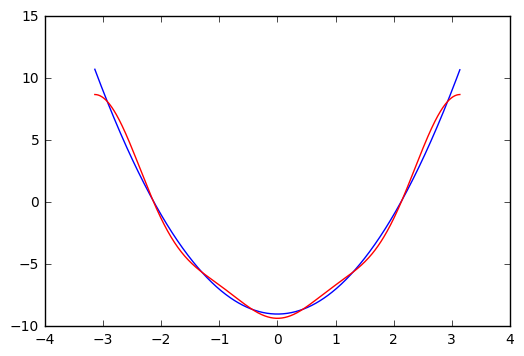

In [30]:
"""
#P4
"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 3

a,b = dlstp(x,y,n)

def f(x):
    return 2 * x**2 - 9

def g(x):
    endTerms = [ a[z] * cos(z*x) + b[z-1] * sin(z*x) for z in range(1,n) ]
    sol = ( a[0] / 2 ) + ( a[n] * cos(n*x) ) + sum(endTerms)
    return sol

g2 = np.vectorize(g)
s = np.arange(-pi, pi, 0.01)
plt.plot(s,  f(s), 'b')
plt.plot(s, g2(s), 'r')


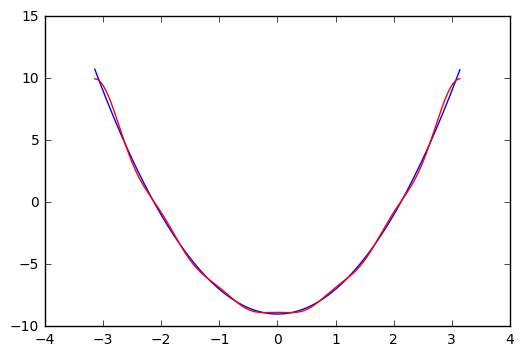

In [31]:
n = 6

a,b = dlstp(x,y,n)

def f(x):
    return 2 * x**2 - 9

def g(x):
    endTerms = [ a[z] * cos(z*x) + b[z-1] * sin(z*x) for z in range(1,n) ]
    sol = ( a[0] / 2 ) + ( a[n] * cos(n*x) ) + sum(endTerms)
    return sol

g2 = np.vectorize(g)
s = np.arange(-pi, pi, 0.01)
plt.plot(s,  f(s), 'b')
plt.plot(s, g2(s), 'r')

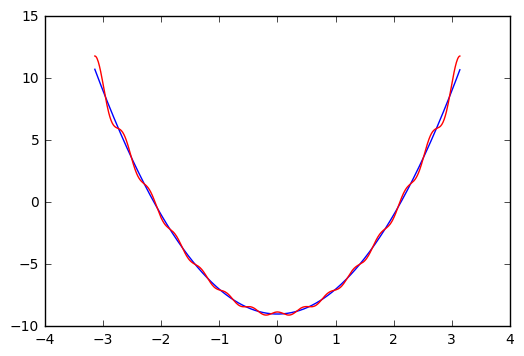

In [36]:
n = 14

a,b = dlstp(x,y,n)

def f(x):
    return 2 * x**2 - 9

def g(x):
    endTerms = [ a[z] * cos(z*x) + b[z-1] * sin(z*x) for z in range(1,n) ]
    sol = ( a[0] / 2 ) + ( a[n] * cos(n*x) ) + sum(endTerms)
    return sol

g2 = np.vectorize(g)
s = np.arange(-pi, pi, 0.01)
plt.plot(s,  f(s), 'b')
plt.plot(s, g2(s), 'r')

As 'n' increases the average distance between f(x) and g(x) for any given 'x' becomes less.